# Yahoo
marco

[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TFMUCM01/TFM/blob/main/Data%20IBEX%2035/ibex35yahoo1.ipynb)


#Exportacion de libreria

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
from datetime import datetime
import textwrap
import requests
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#Explicacion de las variables

📈 Ratios de valoración
PER (Price/Earnings): Cuántas veces los beneficios netos están contenidos en el precio actual de la acción. Un valor alto puede indicar sobrevaloración.

Forward PER: Igual que el PER, pero usando las ganancias proyectadas del próximo año.

PEG Ratio: Relación entre PER y el crecimiento esperado de beneficios. Un PEG < 1 puede indicar una acción infravalorada.

Price/Sales: Relación entre el precio de la acción y las ventas por acción. Útil cuando no hay beneficios.

Price/Book: Compara el precio de la acción con el valor contable por acción. < 1 puede sugerir infravaloración.

🏦 Rentabilidad
Return on Equity (ROE): Rentabilidad sobre el capital propio (%). Muestra cuán eficientemente la empresa usa sus recursos propios.

Return on Assets (ROA): Rentabilidad sobre activos totales (%). Indica cuán rentable es la empresa respecto a todos sus recursos.

Gross Margins: Margen bruto (%). Beneficio después del coste de ventas, antes de otros gastos.

Operating Margins: Margen operativo (%). Beneficio operativo respecto a las ventas.

Profit Margins: Margen neto (%). Beneficio neto sobre ingresos. Mide la rentabilidad final.

💳 Solvencia y liquidez
Debt/Equity: Relación entre deuda total y patrimonio. Mide el apalancamiento financiero.

Current Ratio: Activos corrientes / Pasivos corrientes. Liquidez a corto plazo (>1 es generalmente bueno).

Quick Ratio: Como el Current Ratio pero excluyendo inventarios. Más conservador.

⚖️ Riesgo y dividendos
Beta: Volatilidad relativa respecto al mercado. >1 implica más riesgo; <1 implica menos.

Dividend Yield: Rentabilidad por dividendo (%). Mide cuánto paga la empresa en dividendos en relación con el precio de su acción.

💰 Tamaño y valor de la empresa
Market Cap (M): Capitalización bursátil en millones de euros. Valor total de la empresa en bolsa.

Enterprise Value (M): Valor total de la empresa considerando deuda y caja. Útil para valorar compras.

📊 Magnitudes financieras clave (últimos 12 meses - TTM)
Revenue (TTM): Ingresos totales.

Net Income (TTM): Beneficio neto.

EBITDA: Beneficio antes de intereses, impuestos, depreciación y amortización. Indicador operativo.

Free Cash Flow: Flujo de caja libre. Dinero disponible después de inversiones necesarias.

Total Debt: Deuda total.

Total Cash: Caja y equivalentes disponibles.

🧑‍💼 Datos estructurales
Number of Employees: Número de empleados a tiempo completo.

Sector: Sector económico donde opera la empresa.

Industry: Industria específica.

#DataFrame

In [ ]:
!pip install investpy


In [ ]:
import investpy
import pandas as pd

# Lista de países
paises = [
    'austria', 'belgium', 'denmark', 'finland', 'france', 'germany',
    'greece', 'hungary', 'ireland', 'italy', 'luxembourg', 'netherlands',
    'norway', 'poland', 'portugal', 'spain', 'sweden', 'switzerland',
    'united kingdom'
]

# Corrección para países que dan error
pais_alias = {
    'czech republic': 'czechia'
}

# Diccionario de sufijos Yahoo Finance
sufijos_yahoo = {
    'austria': '.AT', 'belgium': '.BB', 'denmark': '.CO', 'finland': '.HE',
    'france': '.PA', 'germany': '.DE', 'greece': '.AT', 'hungary': '.HU',
    'ireland': '.IR', 'italy': '.MI', 'luxembourg': '.LU', 'netherlands': '.AS',
    'norway': '.OL', 'poland': '.WA', 'portugal': '.LS', 'spain': '.MC',
    'sweden': '.ST', 'switzerland': '.SW', 'united kingdom': '.L'
}

todos = []

for pais in paises:
    try:
        pais_consulta = pais_alias.get(pais, pais)
        df = investpy.get_stocks(country=pais_consulta)
        df['country'] = pais
        df['tickets_y'] = df['symbol'] + sufijos_yahoo.get(pais, '')
        df = df.rename(columns={'symbol': 'ticket'})
        todos.append(df[['ticket', 'tickets_y', 'name', 'country']])
    except Exception as e:
        print(f"❌ Error con {pais}: {e}")

# Unir todos los resultados
df_todos = pd.concat(todos, ignore_index=True)
df_todos.to_csv('tickers_europa.csv', index=False)

print(f"✅ Guardados {len(df_todos)} tickers europeos con encabezados ['ticket', 'tickets_y', 'name', 'country'] en 'tickers_europa.csv'")


✅ Guardados 7674 tickers europeos con encabezados ['ticket', 'tickets_y', 'name', 'country'] en 'tickers_europa.csv'


In [ ]:
import pandas as pd

# Cargar CSV (ajusta el nombre si es diferente)
df = pd.read_csv('tickers_europa.csv')

# Obtener la columna 'tickets_y' como lista, eliminando nulos
tickers = df['tickets_y'].dropna().unique().tolist()

print(tickers)


In [ ]:
import yfinance as yf
import pandas as pd

tickers = [
    "ANA.MC", "ANE.MC", "ACX.MC", "ACS.MC", "AENA.MC", "AMS.MC", "MTS.MC", "SAB.MC", "BKT.MC", "BBVA.MC",
    "CABK.MC", "CLNX.MC", "ENG.MC", "ELE.MC", "FER.MC", "FDR.MC", "GRF.MC", "IAG.MC", "IBE.MC", "ITX.MC",
    "IDR.MC", "COL.MC", "LOG.MC", "MAP.MC", "MEL.MC", "MRL.MC", "NTGY.MC", "RED.MC", "REP.MC", "ROVI.MC",
    "SCYR.MC", "SAN.MC", "SLR.MC", "TEF.MC", "UNI.MC"
]

datos = []

for ti in tickers:
    try:
        info = yf.Ticker(ti).info
        short_name = info.get('shortName', 'Nombre no disponible')
    except Exception as e:
        short_name = 'Error al obtener nombre'
    datos.append({
        "tickers": ti,
        "tickets_abr": ti.replace(".MC", ""),
        "nombre": short_name
    })

df_tickers = pd.DataFrame(datos)
df_tickers.head()


,tickers,tickets_abr,nombre
0,ANA.MC,ANA,"ACCIONA, S.A."
1,ANE.MC,ANE,CORPORACI...N ACCIONA ENERG...A
2,ACX.MC,ACX,"ACERINOX, S.A."
3,ACS.MC,ACS,"ACS,ACTIVIDADES DE CONSTRUCCION"
4,AENA.MC,AENA,"AENA, S.M.E., S.A."


In [ ]:
ratios_dict = {}

ratios_keys = {
    "PER (Price/Earnings)": "trailingPE",
    "Forward PER": "forwardPE",
    "PEG Ratio": "pegRatio",
    "Price/Sales": "priceToSalesTrailing12Months",
    "Price/Book": "priceToBook",
    "Return on Equity": "returnOnEquity",
    "Return on Assets": "returnOnAssets",
    "Debt/Equity": "debtToEquity",
    "Current Ratio": "currentRatio",
    "Quick Ratio": "quickRatio",
    "Gross Margins": "grossMargins",
    "Operating Margins": "operatingMargins",
    "Profit Margins": "profitMargins",
    "Beta": "beta",
    "Dividend Yield": "dividendYield",
    "Market Cap (M)": "marketCap",
    "Enterprise Value (M)": "enterpriseValue",
    "Revenue (TTM)": "totalRevenue",
    "Net Income (TTM)": "netIncomeToCommon",
    "EBITDA": "ebitda",
    "Free Cash Flow": "freeCashflow",
    "Total Debt": "totalDebt",
    "Total Cash": "totalCash",
    "Number of Employees": "fullTimeEmployees",
    "Sector": "sector",
    "Industry": "industry"
}


for ti in tickers:
    try:
        ticker = yf.Ticker(ti)
        info = ticker.info
        ratios_data = {}

        for key, field in ratios_keys.items():
            value = info.get(field, None)

            if isinstance(value, (int, float)) and field in ["marketCap", "enterpriseValue", "totalRevenue", "netIncomeToCommon", "ebitda", "freeCashflow", "totalDebt", "totalCash"]:
                value = round(value / 1_000_000, 2)
            ratios_data[key] = value

        ratios_dict[ti] = ratios_data
    except Exception as e:
        print(f"Error al procesar {ti}: {e}")

df_ratios_ibex35 = pd.DataFrame.from_dict(ratios_dict, orient='index')
df_ratios_ibex35.index.name = "Empresa"

df_ratios_ibex35 = df_ratios_ibex35[sorted(df_ratios_ibex35.columns)]

pd.set_option('display.max_columns', None)

ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yf

Error al procesar ORPHA: Failed to perform, curl: (23) Failure writing output to destination, passed 13 returned 0. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.


ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 
ERROR:yf

In [ ]:
df_ratios_ibex35 = df_ratios_ibex35.reset_index()
df_ratios_ibex35

,Empresa,Beta,Current Ratio,Debt/Equity,Dividend Yield,EBITDA,Enterprise Value (M),Forward PER,Free Cash Flow,Gross Margins,Industry,Market Cap (M),Net Income (TTM),Number of Employees,Operating Margins,PEG Ratio,PER (Price/Earnings),Price/Book,Price/Sales,Profit Margins,Quick Ratio,Return on Assets,Return on Equity,Revenue (TTM),Sector,Total Cash,Total Debt
0,ANA.MC,NaN,1.119,213.074,3.16,2552.00,18505.15,18.344225,-782.63,0.66805,Engineering & Construction,9178.34,832.00,66021,0.10155,None,11.028159,2.016187,0.433636,0.03931,0.797,0.02926,0.17463,21166.00,Industrials,4956.00,12859.00
1,ANE.MC,NaN,1.159,76.998,1.89,1607.00,12337.50,11.770000,-625.75,0.55966,Utilities - Renewable,7641.39,747.00,3224,0.27089,None,10.234783,1.312298,1.688332,0.16505,0.537,0.04154,0.12837,4526.00,Utilities,357.00,4770.00
2,ACX.MC,1.096,1.909,107.744,6.08,326.18,3792.71,8.007874,-312.18,0.34191,Steel,2656.54,92.92,9344,0.04167,None,27.486486,1.176675,0.466607,0.01632,0.949,0.01657,0.03450,5693.30,Basic Materials,1153.35,2365.18
3,ACS.MC,0.699,1.519,277.323,3.24,1649.45,19020.80,32.157894,3004.19,0.36746,Engineering & Construction,15462.45,841.58,157284,0.03986,None,19.213835,3.357881,0.345763,0.01882,1.519,0.02358,0.20842,44719.86,Industrials,10879.00,13758.00
4,AENA.MC,0.983,1.245,83.404,4.10,3445.95,40541.36,3.975874,1782.52,0.80166,Airports & Air Services,35842.50,1974.54,9511,0.31661,None,18.102272,4.165795,6.089594,0.33547,1.218,0.09492,0.24689,5885.86,Industrials,2240.31,7126.03
5,AMS.MC,1.092,1.194,64.167,1.95,2321.98,33480.37,29.102880,NaN,0.43233,Information Technology Services,30636.68,1294.80,20643,0.28299,None,24.555555,5.666213,4.880318,0.20626,0.588,0.09042,0.25842,6277.60,Technology,1493.40,3529.00
6,MTS.MC,1.701,1.349,22.603,1.85,5612.00,30586.12,6.449771,2099.25,0.09658,Steel,21512.94,1206.00,125416,0.05575,None,21.240600,0.423703,0.352920,0.01978,0.429,0.02176,0.02254,60957.00,Basic Materials,5319.00,12047.00
7,SAB.MC,0.923,NaN,NaN,6.26,NaN,55568.02,23.892307,NaN,0.00000,Banks - Diversified,15676.73,1912.64,18920,0.45855,None,8.627777,1.136480,2.605102,0.33417,NaN,0.00811,0.13937,6017.70,Financial Services,17034.72,56136.71
8,BKT.MC,0.414,NaN,NaN,4.86,NaN,2489.23,18.432837,NaN,0.00000,Banks - Regional,11098.66,982.17,6663,0.58943,None,11.126126,1.702744,4.184201,0.37028,NaN,0.00785,0.16569,2652.52,Financial Services,19571.65,11467.07
9,BBVA.MC,1.411,NaN,NaN,5.19,NaN,101153.36,14.425532,NaN,0.00000,Banks - Diversified,78059.77,10151.00,124741,0.56268,None,7.661017,1.418855,2.437540,0.32950,NaN,0.01416,0.19384,32024.00,Financial Services,117957.00,137119.00


In [ ]:
#Fecha del data frame
ticker = yf.Ticker("SAN.MC")
calendar = ticker.calendar
print(calendar)

{'Ex-Dividend Date': datetime.date(2025, 4, 29), 'Earnings Date': [datetime.date(2025, 7, 30)], 'Earnings High': 0.22, 'Earnings Low': 0.19975, 'Earnings Average': 0.2108, 'Revenue High': 15311027160, 'Revenue Low': 15192205000, 'Revenue Average': 15251616080}


# Limpieza de datos

In [ ]:
df_ratios_ibex35 = df_ratios_ibex35[~df_ratios_ibex35["Empresa"].isin(["OHL.MC", "SGRE.MC"])]

In [ ]:
df_ratios_ibex35

,Empresa,Beta,Current Ratio,Debt/Equity,Dividend Yield,EBITDA,Enterprise Value (M),Forward PER,Free Cash Flow,Gross Margins,Industry,Market Cap (M),Net Income (TTM),Number of Employees,Operating Margins,PEG Ratio,PER (Price/Earnings),Price/Book,Price/Sales,Profit Margins,Quick Ratio,Return on Assets,Return on Equity,Revenue (TTM),Sector,Total Cash,Total Debt
0,ANA.MC,NaN,1.119,213.074,3.16,2552.00,18505.15,18.344225,-782.63,0.66805,Engineering & Construction,9178.34,832.00,66021,0.10155,None,11.028159,2.016187,0.433636,0.03931,0.797,0.02926,0.17463,21166.00,Industrials,4956.00,12859.00
1,ANE.MC,NaN,1.159,76.998,1.89,1607.00,12337.50,11.770000,-625.75,0.55966,Utilities - Renewable,7641.39,747.00,3224,0.27089,None,10.234783,1.312298,1.688332,0.16505,0.537,0.04154,0.12837,4526.00,Utilities,357.00,4770.00
2,ACX.MC,1.096,1.909,107.744,6.08,326.18,3792.71,8.007874,-312.18,0.34191,Steel,2656.54,92.92,9344,0.04167,None,27.486486,1.176675,0.466607,0.01632,0.949,0.01657,0.03450,5693.30,Basic Materials,1153.35,2365.18
3,ACS.MC,0.699,1.519,277.323,3.24,1649.45,19020.80,32.157894,3004.19,0.36746,Engineering & Construction,15462.45,841.58,157284,0.03986,None,19.213835,3.357881,0.345763,0.01882,1.519,0.02358,0.20842,44719.86,Industrials,10879.00,13758.00
4,AENA.MC,0.983,1.245,83.404,4.10,3445.95,40541.36,3.975874,1782.52,0.80166,Airports & Air Services,35842.50,1974.54,9511,0.31661,None,18.102272,4.165795,6.089594,0.33547,1.218,0.09492,0.24689,5885.86,Industrials,2240.31,7126.03
5,AMS.MC,1.092,1.194,64.167,1.95,2321.98,33480.37,29.102880,NaN,0.43233,Information Technology Services,30636.68,1294.80,20643,0.28299,None,24.555555,5.666213,4.880318,0.20626,0.588,0.09042,0.25842,6277.60,Technology,1493.40,3529.00
6,MTS.MC,1.701,1.349,22.603,1.85,5612.00,30586.12,6.449771,2099.25,0.09658,Steel,21512.94,1206.00,125416,0.05575,None,21.240600,0.423703,0.352920,0.01978,0.429,0.02176,0.02254,60957.00,Basic Materials,5319.00,12047.00
7,SAB.MC,0.923,NaN,NaN,6.26,NaN,55568.02,23.892307,NaN,0.00000,Banks - Diversified,15676.73,1912.64,18920,0.45855,None,8.627777,1.136480,2.605102,0.33417,NaN,0.00811,0.13937,6017.70,Financial Services,17034.72,56136.71
8,BKT.MC,0.414,NaN,NaN,4.86,NaN,2489.23,18.432837,NaN,0.00000,Banks - Regional,11098.66,982.17,6663,0.58943,None,11.126126,1.702744,4.184201,0.37028,NaN,0.00785,0.16569,2652.52,Financial Services,19571.65,11467.07
9,BBVA.MC,1.411,NaN,NaN,5.19,NaN,101153.36,14.425532,NaN,0.00000,Banks - Diversified,78059.77,10151.00,124741,0.56268,None,7.661017,1.418855,2.437540,0.32950,NaN,0.01416,0.19384,32024.00,Financial Services,117957.00,137119.00


In [ ]:
df_ratios_ibex35 = df_ratios_ibex35.drop(columns=["PEG Ratio","Free Cash Flow"], errors="ignore")

columnas_numericas = df_ratios_ibex35.select_dtypes(include='number').columns
columnas_no_numericas = df_ratios_ibex35.select_dtypes(exclude='number').columns
df_numerico = df_ratios_ibex35[["Industry"] + list(columnas_numericas)]
df_numerico_imputado = df_numerico.groupby("Industry").transform(lambda x: x.fillna(x.mean()))
df_numerico_imputado["Industry"] = df_ratios_ibex35["Industry"]  # restaurar columna agrupadora
df_final = pd.concat([df_numerico_imputado, df_ratios_ibex35[columnas_no_numericas.drop("Industry")]], axis=1)

In [ ]:
columnas_mediana = [
    "Current Ratio",
    "Debt/Equity",
    "Dividend Yield",
    "EBITDA",
    "Total Cash",
    "Return on Equity",
    "Return on Assets",
    "Quick Ratio",
    "PER (Price/Earnings)",
    "Enterprise Value (M)"
]

for col in columnas_mediana:
    if col in df_ratios_ibex35.columns:
        mediana_global = df_ratios_ibex35[col].median()
        df_ratios_ibex35[col] = df_ratios_ibex35[col].fillna(mediana_global)
    else:
        print(f"Advertencia: la columna '{col}' no existe en el DataFrame y será omitida")

In [ ]:
columnas_cero = ["Debt/Equity", "Dividend Yield"]

for col in columnas_cero:
    if col in df_ratios_ibex35.columns:
        df_ratios_ibex35[col] = df_ratios_ibex35[col].fillna(0)
    else:
        print(f"Advertencia: la columna '{col}' no existe en el DataFrame y será omitida")

In [ ]:
df_ratios_ibex35["Ticker"] = df_ratios_ibex35_sorted["Empresa"].str.replace(".MC", "", regex=False)

In [ ]:
df_ratios_ibex35.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Empresa               35 non-null     object 
 1   Beta                  30 non-null     float64
 2   Current Ratio         35 non-null     float64
 3   Debt/Equity           35 non-null     float64
 4   Dividend Yield        35 non-null     float64
 5   EBITDA                35 non-null     float64
 6   Enterprise Value (M)  35 non-null     float64
 7   Forward PER           35 non-null     float64
 8   Gross Margins         35 non-null     float64
 9   Industry              35 non-null     object 
 10  Market Cap (M)        35 non-null     float64
 11  Net Income (TTM)      35 non-null     float64
 12  Number of Employees   35 non-null     int64  
 13  Operating Margins     35 non-null     float64
 14  PER (Price/Earnings)  35 non-null     float64
 15  Price/Book            35 

In [ ]:
df_ratios_ibex35.to_excel("df_ratios_ibex35.xlsx", index=False)
print("✅ Archivo Excel exportado: 'df_ratios_ibex35.xlsx'")

✅ Archivo Excel exportado: 'df_ratios_ibex35.xlsx'


# Ranking

In [ ]:
df_ratios_ibex35["Rank_ROE"] = df_ratios_ibex35["Return on Equity"].rank(ascending=False, method="min")
df_ratios_ibex35["Rank_FCF"] = df_ratios_ibex35["Total Cash"].rank(ascending=False, method="min")
df_ratios_ibex35["Rank_ProfitMargin"] = df_ratios_ibex35["Profit Margins"].rank(ascending=False, method="min")
df_ratios_ibex35["Rank_Total"] = df_ratios_ibex35[["Rank_ROE", "Rank_FCF", "Rank_ProfitMargin"]].mean(axis=1)
df_ratios_ibex35_sorted = df_ratios_ibex35.sort_values("Rank_Total")
print(df_ratios_ibex35_sorted[["Ticker", "Return on Equity", "Total Cash", "Profit Margins", "Rank_Total"]].head(10))

   Ticker  Return on Equity  Total Cash  Profit Margins  Rank_Total
14    FER           0.49661     4810.00         0.35411    7.333333
9    BBVA           0.19384   117957.00         0.32950    7.666667
10   CABK           0.17334    62175.00         0.41932    7.666667
8     BKT           0.16569    19571.65         0.37028    8.666667
19    ITX           0.33037    10785.00         0.15164    9.000000
7     SAB           0.13937    17034.72         0.33417   11.000000
31    SAN           0.13334   419702.01         0.25868   11.000000
4    AENA           0.24689     2240.31         0.33547   11.333333
5     AMS           0.25842     1493.40         0.20626   13.000000
26   NTGY           0.21881     3104.00         0.09947   14.666667


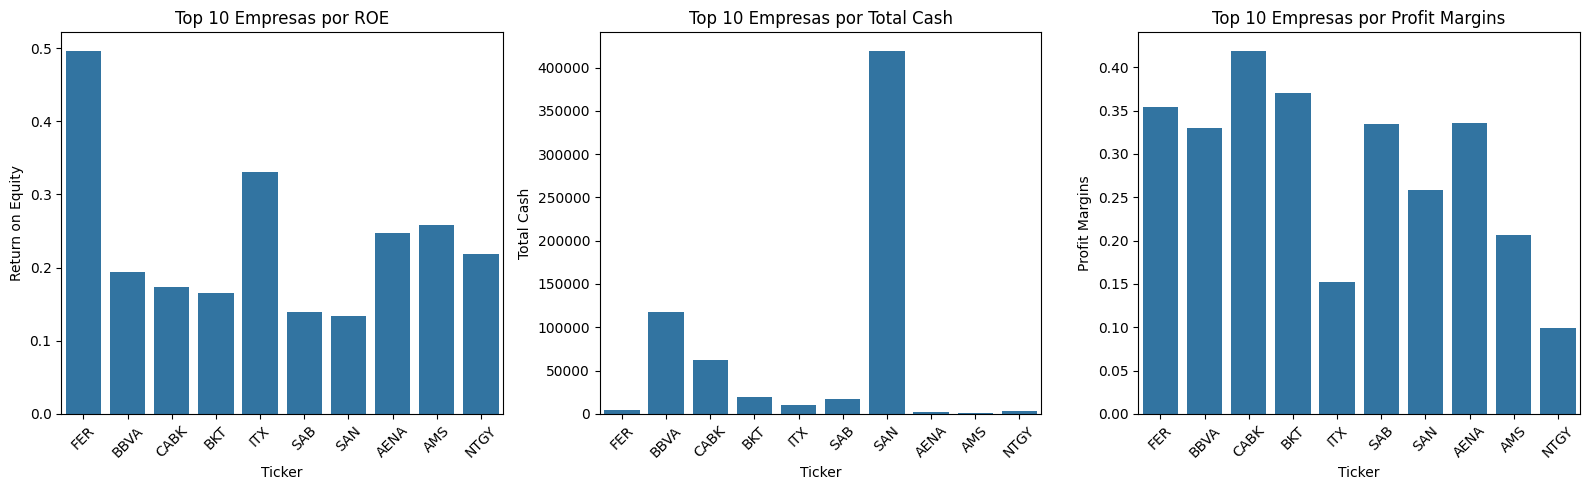

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.barplot(data=df_ratios_ibex35_sorted.head(10), x="Ticker", y="Return on Equity")
plt.xticks(rotation=45)
plt.title("Top 10 Empresas por ROE")

plt.subplot(1,3,2)
sns.barplot(data=df_ratios_ibex35_sorted.head(10), x="Ticker", y="Total Cash")
plt.xticks(rotation=45)
plt.title("Top 10 Empresas por Total Cash")

plt.subplot(1,3,3)
sns.barplot(data=df_ratios_ibex35_sorted.head(10), x="Ticker", y="Profit Margins")
plt.xticks(rotation=45)
plt.title("Top 10 Empresas por Profit Margins")

plt.tight_layout()
plt.show()
